In [10]:
import pandas as pd
import json

In [11]:
with open("dim_customer.json", "r") as json_file:
    customers_data = json.load(json_file)
customers_df = pd.DataFrame(customers_data)

invoices_df = pd.read_csv("fct_invoice.csv")

In [14]:
#number 1 easy
unique_customers = invoices_df["customer_id"].nunique()
print(unique_customers)

5191


In [17]:
#number 2 easy
unique_categories = invoices_df["category"].unique()
unique_categories_num = invoices_df["category"].nunique()
print(unique_categories, unique_categories_num)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir'] 8


In [19]:
#number 3 easy
popular_payment_method = invoices_df["payment_method"].value_counts().idxmax()
times_used = invoices_df["payment_method"].value_counts().max()
print(popular_payment_method, times_used)

Cash 44447


In [20]:
#number 1 medium
category_sales = invoices_df.groupby("category")["price"].sum()
top_3_categories = category_sales.nlargest(3)
print(top_3_categories)

category
Clothing      31075684.64
Shoes         18135336.89
Technology    15772050.00
Name: price, dtype: float64


In [28]:
#number 2 medium
merged_data = invoices_df.merge(customers_df, left_on="customer_id", right_on="id")
total_sales_over_45 = merged_data[merged_data["age"] > 45]["price"].sum()
print(total_sales_over_45)

22370553.27


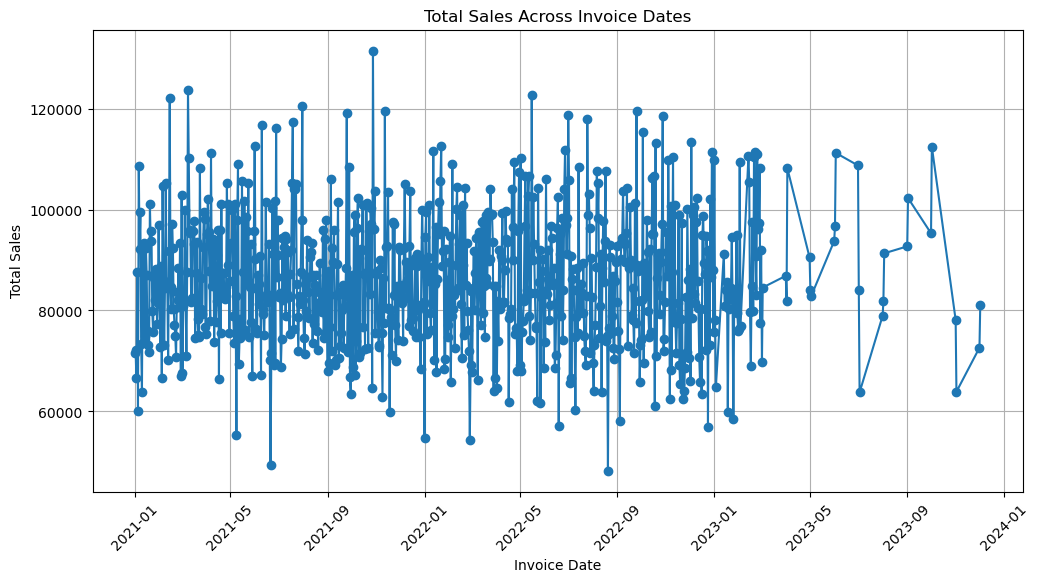

In [29]:
#number 3 medium.acrossdates
import matplotlib.pyplot as plt
invoices_df["invoice_date"] = pd.to_datetime(invoices_df["invoice_date"])
daily_sales = invoices_df.groupby("invoice_date")["price"].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.xlabel("Invoice Date")
plt.ylabel("Total Sales")
plt.title("Total Sales Across Invoice Dates")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

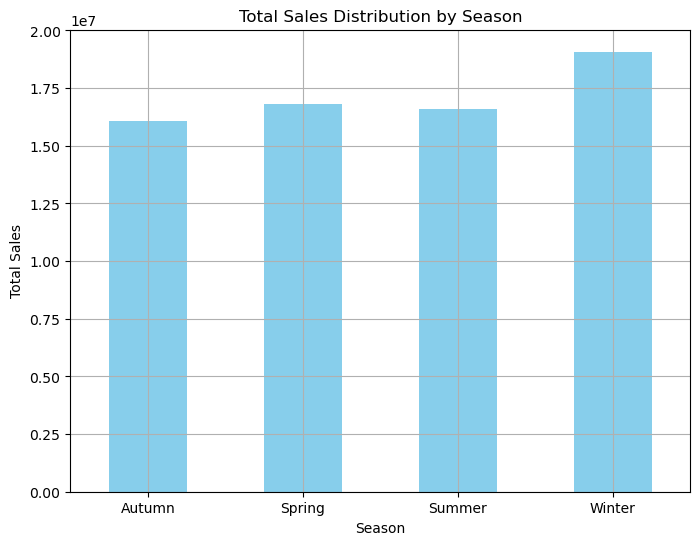

In [30]:
#number 3 medium.acrossseasons
import matplotlib.pyplot as plt
invoices_df["invoice_date"] = pd.to_datetime(invoices_df["invoice_date"])
invoices_df["Month"] = invoices_df["invoice_date"].dt.month

def map_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"
    
invoices_df["Season"] = invoices_df["Month"].apply(map_to_season)

seasonal_sales = invoices_df.groupby("Season")["price"].sum()

plt.figure(figsize=(8, 6))
seasonal_sales.plot(kind="bar", color="skyblue")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.title("Total Sales Distribution by Season")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [33]:
#number 1 hard
customers_df["Decade Age Range"] = customers_df["age"].apply(lambda age: f"{(age // 10) * 10}-{((age // 10) * 10) + 9}")
merged_data = invoices_df.merge(customers_df, left_on="customer_id", right_on="id")

pivot_df = merged_data.groupby(["category", "Decade Age Range"])["price"].sum().reset_index()

pivot_table_sales = pd.pivot_table(pivot_df, values="price", index="category", columns="Decade Age Range", aggfunc="sum", fill_value=0)

print(pivot_table_sales)

Decade Age Range  10.0-19.0   20.0-29.0   30.0-39.0   40.0-49.0   50.0-59.0  \
category                                                                      
Books               3469.35    21619.05    22997.70    23361.30    20664.60   
Clothing          518238.16  2818351.36  3074919.76  3066817.60  2803647.44   
Cosmetics          29681.80   165079.60   198054.86   181343.60   160932.28   
Food & Beverage     3645.31    20428.38    23744.20    24460.71    19999.52   
Shoes             274277.69  1630061.72  1912141.62  1889335.16  1591650.84   
Souvenir            3296.13    15295.92    17548.08    17759.22    15084.78   
Technology        287700.00  1426950.00  1669500.00  1630650.00  1220100.00   
Toys               17203.20   102466.56   115297.28   106910.72    94115.84   

Decade Age Range   60.0-69.0   70.0-79.0   80.0-89.0      nan-nan  
category                                                           
Books               21513.00    15437.85     7575.00     90339.45  
Cloth